# CONVOLUTIONAL NEURAL NETWORK
## Convolutional layer
Convolution represents a straightforward application of a filter to an input, resulting in an activation—the activation transforms the input to a neuron into an output, which is then passed to the next layer. When this application is repeated multiple times, the resulting output is an activation map, or a feature map, which highlights the locations and intensities of recognized features in the input, such as an image.
## Convolutional Filter
In the context of CNNs, convolution is a linear operation that involves multiplying a set of weights with the input. Since this technique is designed for two-dimensional inputs, such as images, the multiplication is performed between a set of input data and a two-dimensional array of weights, also known as a filter or kernel. The filter is always smaller than the input data (image), and the multiplication between the filter and the input is scalar multiplication. Scalar multiplication is necessary because the result of this operation must be a single value (scalar) rather than an array or matrix of new values. Using a filter smaller than the input data allows the application of the same filter to the input data multiple times, i.e., at different locations in the image. Systematically applying a filter across the entire image creates the possibility of detecting a specific feature at any location in the image (translation invariance). To ensure that the filter can fully process all regions of the input, including its edges, padding is often applied to the input data. Padding adds extra rows and columns (typically filled with zeros) around the border of the input, preventing the reduction of spatial dimensions after convolution. The output two-dimensional array obtained by applying a filter is called a feature map. The result of the convolution does not necessarily have the same dimensions as the input image due to:
- Boundary effects, which can be addressed by using padding;
- The application of a stride during the convolution.

It is important to emphasize that the input to a CNN is always a tensor with the shape (image_height, image_width, number_of_channels). The number of channels refers to the color channels of the image, e.g., 1 for grayscale images, 3 for RGB images, etc. The output of each Conv2D and MaxPooling2D layer is a 3D tensor with the shape (height, width, filters). Convolution and max-pooling form the fundamental building blocks of a CNN.
In its simplest form, a CNN consists of three parts:
1. A chain of convolutional blocks (pairs of Conv2D and MaxPooling2D layers);
2. A Flatten layer;
3. A chain of output Dense layers.

The size of the feature maps is halved after each MaxPooling2D layer. For instance, before the first MaxPooling2D layer, the feature map dimensions are 26×26, but the max-pooling operation reduces them to 13×13. This is precisely the role of max pooling: reducing the dimensions of feature maps, similar to convolution with strides.
Max pooling involves extracting patches from the input feature map and forwarding the maximum value within each patch to the output (if the images have multiple channels, such as RGB, the operation is performed separately for
each channel). This operation is typically performed with a window size of 2×2 and a stride of 2, while convolution is performed with a 3×3 kernel and a stride of 1 (i.e., without skipping any positions). An alternative to max pooling is average pooling (average taken instead of max). However, in practice, max pooling has proven to be more effective and easier to process on a computer due to more information retained by observing the maximum presence of a feature.

### CNN as chain of Conv2D and MaxPooling2D layers

In [ ]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

# Model: Sequential
model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Input(shape=(28, 28, 1)))  # Define the input shape here
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # 32 is the number of filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary() # One item of the output will be: conv2d_8 (Conv2D) (None, 3, 3, 64)

# The next step is to pass the current output tensor (with the shape (3, 3, 64)) to a fully connected classification
# network, similar to those we encountered earlier (a chain of fully connected Dense layers)
# Since these layers process vectors, which are one-dimensional, and our current network output is three-dimensional,
# it is necessary to first convert the 3D data into 1D data. This is done by the Flatten() - 1D vector output
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary() # The output of the above summary is now: (None, 576)


# Now, we train and evaluate the network
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

## Keras Conv2D Layer
### Activation function
An activation function determines how a neuron processes input and passes the output to the next layer, enabling the network to model complex patterns. The major types are: ReLU, Sigmoid, Softmax and Tanh.

1. ReLU (Rectified Linear Unit): Outputs the input directly if it's positive; otherwise, it outputs 0. It helps in handling large networks by avoiding the "vanishing gradient" problem. Example: Input 5 → Output 5; Input -2 → Output 0.

2. Sigmoid: Compresses input values into a range between 0 and 1. Often used when probabilities or binary outputs are needed. Example: Input 2 → Output ~0.88; Input -2 → Output ~0.12.

3. Softmax: Converts inputs into probabilities that sum to 1, making it ideal for multi-class classification. Example: Input [2, 1, 0.5] → Output [0.59, 0.26, 0.15] (probabilities of each class).

4. Tanh (Hyperbolic Tangent): Scales input values into a range between -1 and 1, providing balanced outputs for both positive and negative values. Example: Input 2 → Output ~0.96; Input -2 → Output ~-0.96.

In [4]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import keras

keras.layers.Conv2D(
    filters=2, # Number of filters the convolutional layer will learn from. It determines the number of output feature maps. It is a required parameter.
    kernel_size=2, # Dimensions of the kernel. This is a required parameter and must be an odd number.
    strides=(1, 1), # Step size for the filter movement. Can be an integer or a tuple of two integers. Default is (1, 1).
    padding="valid", # Whether padding is applied. ’Valid’ means no padding. ’Same’ applies padding to preserve the spatial dimensions. Default is no padding.
    data_format=None, # Specifies the data format (e.g., ’channels_last’ or ’channels_first’) for compatibility with TensorFlow. Typically left as the default.
    dilation_rate=(1, 1), # Specifies the dilation rate for the convolution. Default value is 1. Dilated convolution introduces gaps within the filter.
    activation=None, # The activation function to apply. If not specified, no activation function is used.
    use_bias=True, # Determines whether a bias term is added to the output. Default is True.
    kernel_initializer="glorot_uniform", # How kernel weights are initialized. Common options: ’glorot_uniform’ (default), ’he_normal’, or custom initializers.
    bias_initializer="zeros", # Specifies the initializer for the bias. Default is ’zeros’.
    kernel_regularizer=None, # Adds regularization (e.g., L1 or L2 penalties) to the kernel weights to prevent overfitting. Default is None.
    bias_regularizer=None, # Adds regularization to the bias. Default is None.
    activity_regularizer=None, #
    kernel_constraint=None,
    bias_constraint=None)

<Conv2D name=conv2d_3, built=False>

## Keras MaxPooling2D Layer
The max-pooling operation is supported in the Keras framework through the MaxPooling2D layer. This layer is specifically designed to reduce the spatial dimensions of feature maps while retaining their most important information. Max pooling works by dividing the input feature map into patches and outputting the maximum value from each patch, effectively downsampling the input. It is commonly used to reduce computational costs, control overfitting, and retain key spatial features.

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf

tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), # Specifies the size of the pooling window (e.g., (2, 2)). The default value is (2, 2).
    strides=None, # Defines the step size for the pooling window. By default, it is equal to the pool_size.
    padding="valid", # Whether padding is applied. ’Valid’ means no padding. ’Same’ means the output has the same dimensions as the input. Default is ’valid’.
    data_format=None # Specifies the data format, either ’channels_last’ (default) or ’channels_first’, for compatibility with TensorFlow.
)

# Practice Assignment

### 1. Load CIFAR-10
Load the CIFAR-10 dataset and print the shapes of the training and test data as well as their labels.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

(trainX, trainy), (testX, testy) = cifar10.load_data() # load data
print("Training data shape:", trainX.shape)
print("Training labels shape:", trainy.shape)
print("Test data shape:", testX.shape)
print("Test labels shape:", testy.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


### 2. Plot
Using Matplotlib (specifically, pyplot), plot the first 9 images from this dataset. What can you say about the images? Does this resolution correspond to the resolution of modern photographs? How might the resolution of an image affect the performance of machine learning algorithms and models during classification?

In [ ]:
# Plot the first 9 images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(trainX[i])
    ax.axis('off')  # Hide axis
    ax.set_title(f"Label: {trainy[i][0]}")  # Display the label

plt.show()

1. What can you say about the images?<br>
The images are low resolution (32x32 pixels), which is why they appear blurry and have visible pixels, leading to a less detailed representation.

2. Does this resolution correspond to the resolution of modern photographs?<br>
No, this resolution (32x32 pixels) is much lower than modern photographs, which typically have resolutions in the thousands of pixels (e.g., 1920x1080 or higher).

3. How might the resolution of an image affect the performance of machine learning algorithms and models during classification?<br>
Lower resolution can affect the performance of machine learning models by making it harder to identify fine details in the images, leading to less accurate classification. Higher-resolution images provide more information, allowing models to detect more complex patterns, but they also require more computational power.

### 3. Preprocessing
The labels should be converted into arrays of 10 elements (i.e., perform one-hot encoding), and the images (i.e., the data) should be converted to the float32 type and scaled to a range of 0 to 1. Since we know that the maximum value of any channel is 255, scaling can be achieved by simply dividing by 255.
For the labels, use the to_categorical function, while for the training data,
use astype to convert the data to a floating-point type, followed by division by 255 for the data scaling step.

In [13]:
from keras.utils import to_categorical

# One-hot encoding for labels
trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

# Convert images to float32 and scale them
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0



### Define Model
The next step is defining the model. A helper function is usually created that returns the complete model. This approach is used because it is often necessary to modify the model architecture and experiment with different layers.
Define a helper function for creating the model. For now, the function will build a simple CNN (also referred to as a baseline model). The model should include the following layers:
1. Conv2D layer with 32 filters, dimensions 3×3, with padding enabled;
2. Conv2D layer with 32 filters, dimensions 3×3, with padding enabled;
3. MaxPooling2D layer with dimensions 2×2;
4. Conv2D layer with 64 filters, dimensions 3×3, with padding enabled;
5. Conv2D layer with 64 filters, dimensions 3×3, with padding enabled;
6. MaxPooling2D layer with dimensions 2×2;
7. Flatten layer;
8. Dense layer with 128 neurons, using the relu activation function;
9. Output Dense layer with 10 neurons and the softmax activation function.

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Input

# The reason why steps 1 and 2 are the same is to enable the model to learn more complex features by stacking multiple convolutional layers.
# Each convolutional layer extracts features from the input, and stacking them allows the network to learn more hierarchical representations
# of the data. The first layer learns low-level features (like edges or textures), and the second layer can learn more complex patterns or
# combinations of those features. This is a common strategy in CNNs to capture different levels of abstraction.

model = Sequential()

# Input layer
model.add(Input(shape=(32, 32, 3)))

# First Conv2D Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

# Second Conv2D Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

# MaxPooling2D Layer
model.add(MaxPooling2D((2, 2)))

# Third Conv2D Layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Fourth Conv2D Layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# MaxPooling2D Layer
model.add(MaxPooling2D((2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Output Layer with 10 neurons
model.add(Dense(10, activation='softmax'))




### Compiling and training
Add the necessary code to compile the model within the define_model function. The optimizer should be gradient descent with a learning rate of 0.001 and momentum of 0.9, as follows: opt = SGD(lr=0.001, momentum=0.9)
The compilation should be performed such that the loss function is categorical_crossentropy, and the metric is accuracy. Add the line for compiling the model at the end of the helper function.
Train the model. The parameters that will be used for training are as
follows:
1. epochs=15
2. batch_size=64
3. validation_data=(testX, testY) (normally, a separate validation set would be created, but in this example, we will use the test set for validation)

1. What accuracy was achieved? 1.0 (loss: 0.00024)
2. Is this result satisfactory? yes

In [21]:
from keras.optimizers import SGD

# Compile the model with SGD optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture history
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX, testy), verbose=0)

# Print loss and accuracy for each epoch
for epoch in range(15):
    print(f"Epoch {epoch + 1}: Loss = {history.history['loss'][epoch]}, Accuracy = {history.history['accuracy'][epoch]}")

# Print final loss and accuracy
print(f"\nFinal Loss: {history.history['loss'][-1]}, Final Accuracy: {history.history['accuracy'][-1]}")



Epoch 1: Loss = 0.006642505992203951, Accuracy = 0.9988399744033813
Epoch 2: Loss = 0.0017142487922683358, Accuracy = 0.9998400211334229
Epoch 3: Loss = 0.0014779279008507729, Accuracy = 0.999779999256134
Epoch 4: Loss = 0.0009720565867610276, Accuracy = 0.9998599886894226
Epoch 5: Loss = 0.0006383308209478855, Accuracy = 0.9999799728393555
Epoch 6: Loss = 0.0005303894286043942, Accuracy = 0.9999799728393555
Epoch 7: Loss = 0.00043291697511449456, Accuracy = 1.0
Epoch 8: Loss = 0.00039850559551268816, Accuracy = 1.0
Epoch 9: Loss = 0.0003528242523316294, Accuracy = 1.0
Epoch 10: Loss = 0.0003260774537920952, Accuracy = 1.0
Epoch 11: Loss = 0.0003039306611754, Accuracy = 1.0
Epoch 12: Loss = 0.0002857194631360471, Accuracy = 1.0
Epoch 13: Loss = 0.00026967222220264375, Accuracy = 1.0
Epoch 14: Loss = 0.0002558609994594008, Accuracy = 1.0
Epoch 15: Loss = 0.00024341871903743595, Accuracy = 1.0

Final Loss: 0.00024341871903743595, Final Accuracy: 1.0


### Accuracy vs loss plot
Plot the behavior of accuracy and loss over the epochs. What can you conclude from the plots?<br>
The model is successfully learning the patterns in the data, and there is minimal error in its predictions. However, it may also indicate that the model is overfitting if it performs significantly better on the training data than on unseen data.

In [ ]:
import matplotlib.pyplot as plt


# Plot accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Accuracy and Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


### Prevent overfitting
In the previous model, there is a fully connected layer with 128 neurons, which essentially takes all features and uses them for training. To prevent overfitting, it is possibleto randomly disable some neurons during training via Dropout layer. The Dropout layer increases the robustness of the network and prevents overfitting by ensuring that neurons do not
always learn during training but instead have a chance to be "dropped" (hence the name of the layer). This helps the model avoid learning the training features too perfectly, thereby improving its generalization to unseen data. Add a Dropout layer to the model, with a probability of 0.5, before the first Dense layer. Repeat the training, evaluation, and plotting of loss and accuracy.
1. Are the results better? No. Worse.
2. Does overfitting still occur?
Since the accuracy is no longer reaching 1.0 and the loss is still significant, it is likely that overfitting has been reduced. The model is now more generalizable, and it is not fitting the training data too perfectly, which is a sign that overfitting is less of an issue.

In [ ]:
from keras.layers import Dropout


model = Sequential()

# Adding convolutional layers
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout layer before the Dense layer
model.add(Dropout(0.5))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX, testy), verbose=0)

# Print loss vs accuracy
for epoch in range(15):
    print(f"Epoch {epoch + 1}: Accuracy = {history.history['accuracy'][epoch]}, Loss = {history.history['loss'][epoch]}")

# Print final loss and accuracy
print(f"\nFinal Loss: {history.history['loss'][-1]}, Final Accuracy: {history.history['accuracy'][-1]}")

# Plot accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Accuracy and Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


### Final version of the model
Now we will create the final version of our model. Perform the following modifications to the existing model:
1. Before the Flatten layer, add another block of two Conv2D layers and one MaxPooling2D layer, following the pattern of the existing blocks. Set the number of filters for the two Conv2D layers to 128;
2. Change the existing Dropout probability to 0.2 and move it after the first Dense layer;
3. After each MaxPooling2D layer, add a Dropout layer with a probability of 0.2.
4. This model should be trained for 30 epochs.

1. What accuracy is achieved?<br>
The final accuracy achieved is 0.6898 (or approximately 69%).

2. Does overfitting occur?<br>
No. The model's accuracy improves consistently throughout the epochs, and there is no noticeable divergence between training and validation performance. Additionally, the accuracy doesn't plateau too early, which further suggests that the model is still generalizing well.

Epoch 1: Accuracy = 0.11620000004768372, Loss = 2.3002102375030518
Epoch 2: Accuracy = 0.17015999555587769, Loss = 2.217500686645508
Epoch 3: Accuracy = 0.21741999685764313, Loss = 2.065056800842285
Epoch 4: Accuracy = 0.24277999997138977, Loss = 1.9835296869277954
Epoch 5: Accuracy = 0.28345999121665955, Loss = 1.86732816696167
Epoch 6: Accuracy = 0.33032000064849854, Loss = 1.768776297569275
Epoch 7: Accuracy = 0.3661400079727173, Loss = 1.6860361099243164
Epoch 8: Accuracy = 0.39820000529289246, Loss = 1.616855263710022
Epoch 9: Accuracy = 0.42372000217437744, Loss = 1.5475980043411255
Epoch 10: Accuracy = 0.4469200074672699, Loss = 1.4949259757995605
Epoch 11: Accuracy = 0.4711799919605255, Loss = 1.4452391862869263
Epoch 12: Accuracy = 0.4885599911212921, Loss = 1.404173493385315
Epoch 13: Accuracy = 0.5090399980545044, Loss = 1.3527129888534546
Epoch 14: Accuracy = 0.5225800275802612, Loss = 1.3209840059280396
Epoch 15: Accuracy = 0.5392400026321411, Loss = 1.2766108512878418

Fi

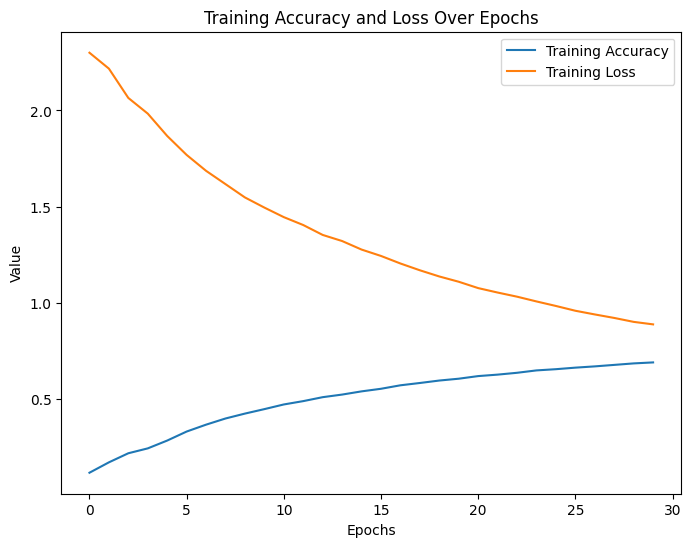

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

model = Sequential()

# First Conv2D Block
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))  # Dropout after first MaxPooling2D

# Second Conv2D Block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))  # Dropout after second MaxPooling2D

# Third Conv2D Block (newly added)
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))  # Dropout after third MaxPooling2D

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))

# Dropout after Dense layer
model.add(Dropout(0.2))  # Dropout after first Dense layer

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainy, epochs=30, batch_size=64, validation_data=(testX, testy), verbose=0)

# Print accuracy vs loss
for epoch in range(15):
    print(f"Epoch {epoch + 1}: Accuracy = {history.history['accuracy'][epoch]}, Loss = {history.history['loss'][epoch]}")

# Print final loss and accuracy
print(f"\nFinal Loss: {history.history['loss'][-1]}, Final Accuracy: {history.history['accuracy'][-1]}")

# Plot accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Accuracy and Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

